In [99]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import glob
from radioReduction import *
from astropy.stats import LombScargle
from scipy import optimize
from scipy.interpolate import make_interp_spline, BSpline


In [88]:
'''
Gathering the data
'''
# Reading all the average flux densities data tbales
dir = '1314/'
folder = glob.glob('1314/*-LLRR.dat')

# reading in the data tables
dt = []
for i in range(len(folder)):
    dt.append(pd.read_table(folder[i]))

print(folder)
# Calculating the means and uncert
mjd,re,ure = [],[],[]

for i in range(len(dt)):
        m,f,e = meanData(dt[i])
        mjd.append(m)
        re.append(f)
        ure.append(e)
    

['1314/2M1314e20-LLRR.dat', '1314/2M1314e9-LLRR.dat', '1314/2M1314e7-LLRR.dat', '1314/2M1314e13-LLRR.dat', '1314/2M1314e14-LLRR.dat', '1314/2M1314e17-LLRR.dat', '1314/2M1314e6-LLRR.dat', '1314/2M1314e3-LLRR.dat', '1314/2M1314e15-LLRR.dat', '1314/2M1314e4-LLRR.dat', '1314/2M1314e2-LLRR.dat', '1314/2M1314e8-LLRR.dat', '1314/2M1314e18-LLRR.dat', '1314/2M1314e12-LLRR.dat', '1314/2M1314e1-LLRR.dat', '1314/2M1314e10-LLRR.dat', '1314/2M1314e11-LLRR.dat', '1314/2M1314e5-LLRR.dat', '1314/2M1314e16-LLRR.dat', '1314/2M1314e19-LLRR.dat']


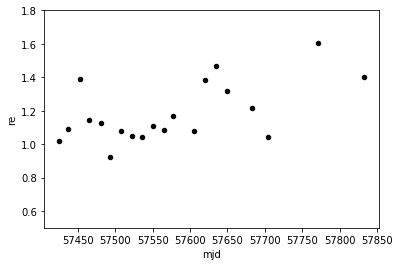

,mjd,re,ure
14,57425.506605,1.020343,0.006400
10,57437.457583,1.089653,0.006515
7,57452.489273,1.391953,0.007295
9,57465.226390,1.141766,0.007431
17,57481.170270,1.123873,0.006687
6,57493.139864,0.920923,0.007645
2,57508.351630,1.080390,0.007574
11,57522.261785,1.045919,0.006415
1,57536.190674,1.041125,0.006503
15,57551.056628,1.110112,0.007739


In [89]:
longTerm = pd.DataFrame(data={'mjd':mjd,'re':re,'ure':ure})
longTerm = longTerm.sort_values(by='mjd')
longTerm.plot.scatter('mjd','re',yerr='ure',color='black')
plt.ylim(0.5,1.8)
plt.show()
longTerm

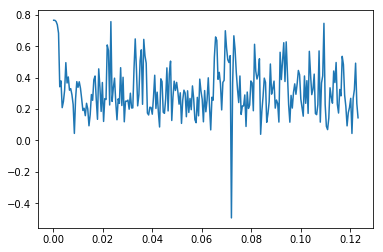

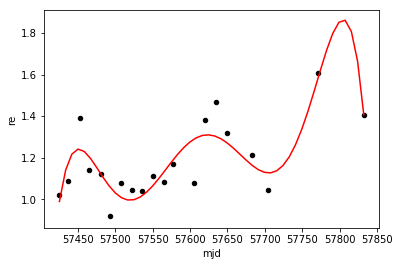

In [95]:
freq, power = LombScargle(longTerm['mjd'],longTerm['re'],longTerm['ure'],nterms=3).autopower()
plt.plot(freq,power)
plt.show()
best_freq = freq[np.argmax(power)]
x_fit = np.linspace(np.min(longTerm['mjd']),np.max(longTerm['mjd']))
y_fit = LombScargle(longTerm['mjd'],longTerm['re'],longTerm['ure'],nterms=3).model(x_fit,best_freq)

longTerm.plot.scatter('mjd','re',yerr='ure',color='black')
plt.plot(x_fit,y_fit,color='red')
plt.show()

[-1.56149772e-01  4.99601197e+00  2.32649742e+02 -1.41113360e-01
  1.00787909e+00 -4.54319700e+02 -1.18054326e-01  1.99765539e+00
  1.38429989e+02  1.19096294e+00]


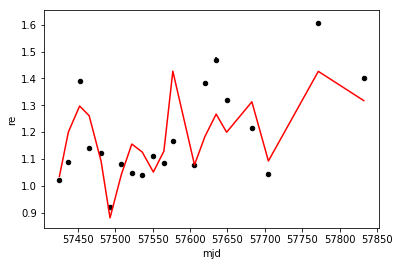

In [106]:
# Trying to fit a 3rd order polynomial 
x = longTerm['mjd'] 
y = longTerm['re']
yerr = longTerm['ure']

def Sine(x,*theta):
    a,b,c,d,e,f,g,h,i,j = theta
    return a*np.sin(b*x+c)+d*np.sin(e*x+f)+g*np.sin(h*x+i)+j

p0 = [5,5,2,1,1,1.5,4,2,2,1]
params, params_covariance = optimize.curve_fit(Sine,x,y,p0=p0,sigma=yerr)
print(params)

longTerm.plot.scatter('mjd','re',yerr='ure',color='black')
plt.plot(x,Sine(x,*params),color='red')
plt.show()